<a href="https://colab.research.google.com/github/liuxiaoyan16/TensorFlow2.0-Examples/blob/master/%E4%B8%A4%E7%82%B9%E7%9A%84%E6%96%9C%E7%8E%87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/Users/liuxiaoyan/Desktop/data1

*   列表项
*   列表项



In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import glob
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_image_path=glob.glob('/content/drive/My Drive/data1/*.jpeg')

In [ ]:
data_count=len(data_image_path)

In [ ]:
data_image_path[-5:]

['/content/drive/My Drive/data1/4_1.jpeg',
 '/content/drive/My Drive/data1/3_0.jpeg',
 '/content/drive/My Drive/data1/2_1.jpeg',
 '/content/drive/My Drive/data1/20_1.jpeg',
 '/content/drive/My Drive/data1/19_1.jpeg']

In [ ]:
data_image_label = [int(p.split('_',1)[-1] == '1.jpeg') for p in data_image_path]

In [ ]:
data_image_label[-5:]

[1, 0, 1, 1, 1]

In [ ]:
data_image_label[ :5]

[1, 0, 1, 0, 1]

In [ ]:
data_image_label.count(0)

986

In [ ]:
data_image_label.count(1)

1024

In [ ]:
data_image_label=tf.cast(data_image_label,tf.int64)

In [ ]:
data_image_label= tf.data.Dataset.from_tensor_slices(data_image_label)

In [ ]:
data_image= tf.data.Dataset.from_tensor_slices(data_image_path)

In [ ]:
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=1)
    image = tf.image.resize(image, [64, 64])
    image = tf.cast(image, tf.float32)
    image = image/255.0  # normalize to [0,1] range
    return image

In [ ]:
data_image = data_image.map(load_and_preprocess_image) 

In [ ]:
dataset=tf.data.Dataset.zip((data_image,data_image_label))

In [ ]:
data_image

<MapDataset shapes: (64, 64, 1), types: tf.float32>

In [ ]:
dataset

<ZipDataset shapes: ((64, 64, 1), ()), types: (tf.float32, tf.int64)>

In [ ]:
dataset=dataset.shuffle(2000)

In [ ]:
test_count=int(data_count*0.2)
train_count=data_count-test_count

In [ ]:
train_data = dataset.skip(test_count)

test_data = dataset.take(test_count)

In [ ]:
train_data

<SkipDataset shapes: ((64, 64, 1), ()), types: (tf.float32, tf.int64)>

In [ ]:
BATCH_SIZE = 32

In [ ]:
train_data= train_data.repeat().shuffle(train_count).batch(BATCH_SIZE)

In [ ]:
train_data

<BatchDataset shapes: ((None, 64, 64, 1), (None,)), types: (tf.float32, tf.int64)>

In [ ]:
a=train_data.take(1)

In [ ]:
test_data = test_data.batch(BATCH_SIZE)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(4, [3,3], activation='relu', padding='same',input_shape=(64, 64, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(8, [3,3],padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(16, [3,3],padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, [3,3], padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, [3,3], padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 4)         40        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 4)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 8)         296       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          4

In [ ]:
epochs=100
learning_rate = 0.0001
decay_rate = learning_rate / epochs

sgd = tf.optimizers.Adam(lr=learning_rate, decay=decay_rate,)

In [ ]:
model.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['acc']
)

In [ ]:
model.fit(train_data,  epochs=100, steps_per_epoch=train_count//BATCH_SIZE, validation_data=test_data, validation_steps=test_count//BATCH_SIZE)

Epoch 1/100
50/50 [==============================] - 2s 47ms/step - loss: 0.6930 - acc: 0.5094 - val_loss: 0.6917 - val_acc: 0.6745
Epoch 2/100
50/50 [==============================] - 2s 43ms/step - loss: 0.6905 - acc: 0.6012 - val_loss: 0.6880 - val_acc: 0.5885
Epoch 3/100
50/50 [==============================] - 2s 43ms/step - loss: 0.6871 - acc: 0.6275 - val_loss: 0.6833 - val_acc: 0.7266
Epoch 4/100
50/50 [==============================] - 2s 43ms/step - loss: 0.6782 - acc: 0.7056 - val_loss: 0.6706 - val_acc: 0.6328
Epoch 5/100
50/50 [==============================] - 4s 81ms/step - loss: 0.6568 - acc: 0.7381 - val_loss: 0.6452 - val_acc: 0.7188
Epoch 6/100
50/50 [==============================] - 4s 80ms/step - loss: 0.6198 - acc: 0.7312 - val_loss: 0.6000 - val_acc: 0.7292
Epoch 7/100
50/50 [==============================] - 4s 79ms/step - loss: 0.5598 - acc: 0.7713 - val_loss: 0.5234 - val_acc: 0.7630
Epoch 8/100
50/50 [==============================] - 4s 79ms/step - loss: 0.

TypeError: ignored

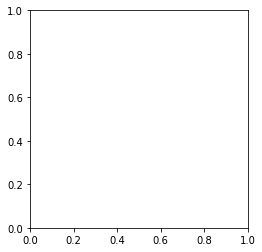

In [ ]:
image_path=data_image_path[2]
image = tf.io.read_file(image_path)
image = tf.image.decode_jpeg(image, channels=1)
image = tf.image.resize(image, [64, 64])
image = tf.cast(image, tf.float32)
image = image/255.0
plt.imshow(image_path)

In [ ]:
layer_output=[layer.output for layer in model.layers[ :9]]

In [ ]:
activation_model = models.Model(inputs=model.input, outputs=layer_output)

In [ ]:
image=tf.expand_dims(image, 0)

In [ ]:
image.shape

In [ ]:
activations = activation_model.predict(image)

In [ ]:
activations[0].shape

In [ ]:
plt.matshow(activations[0][0,:,:,0], cmap=plt.cm.gray) #第1卷积层的第1特征层输出
plt.matshow(activations[0][0,:,:,1], cmap=plt.cm.gray) #第1卷积层的第0特征层输出

In [ ]:
plt.matshow(activations[1][0,:,:,2], cmap=plt.cm.gray) #第1卷积层的第1特征层输出
plt.matshow(activations[1][0,:,:,3], cmap=plt.cm.gray) #第1卷积层的第0特征层输出

In [ ]:
plt.matshow(activations[2][0,:,:,0], cmap=plt.cm.gray) #第1卷积层的第1特征层输出
plt.matshow(activations[2][0,:,:,1], cmap=plt.cm.gray) #第1卷积层的第0特征层输出
plt.matshow(activations[2][0,:,:,2], cmap=plt.cm.gray) #第1卷积层的第1特征层输出
plt.matshow(activations[2][0,:,:,3], cmap=plt.cm.gray) #第1卷积层的第0特征层输出
plt.matshow(activations[2][0,:,:,4], cmap=plt.cm.gray) #第1卷积层的第1特征层输出
plt.matshow(activations[2][0,:,:,5], cmap=plt.cm.gray) #第1卷积层的第0特征层输出
plt.matshow(activations[2][0,:,:,6], cmap=plt.cm.gray) #第1卷积层的第1特征层输出
plt.matshow(activations[2][0,:,:,7], cmap=plt.cm.gray) #第1卷积层的第0特征层输出

In [ ]:
plt.matshow(activations[4][0,:,:,0], cmap=plt.cm.gray) #第1卷积层的第1特征层输出
plt.matshow(activations[4][0,:,:,1], cmap=plt.cm.gray) #第1卷积层的第0特征层输出
plt.matshow(activations[4][0,:,:,2], cmap=plt.cm.gray) #第1卷积层的第1特征层输出
plt.matshow(activations[4][0,:,:,3], cmap=plt.cm.gray) #第1卷积层的第0特征层输出
plt.matshow(activations[4][0,:,:,4], cmap=plt.cm.gray) #第1卷积层的第1特征层输出
plt.matshow(activations[4][0,:,:,5], cmap=plt.cm.gray) #第1卷积层的第0特征层输出
plt.matshow(activations[4][0,:,:,6], cmap=plt.cm.gray) #第1卷积层的第1特征层输出
plt.matshow(activations[4][0,:,:,7], cmap=plt.cm.gray) #第1卷积层的第0特征层输出
plt.matshow(activations[4][0,:,:,8], cmap=plt.cm.gray) #第1卷积层的第1特征层输出
plt.matshow(activations[4][0,:,:,9], cmap=plt.cm.gray) #第1卷积层的第0特征层输出
plt.matshow(activations[4][0,:,:,10], cmap=plt.cm.gray) #第1卷积层的第1特征层输出
plt.matshow(activations[4][0,:,:,11], cmap=plt.cm.gray) #第1卷积层的第0特征层输出
plt.matshow(activations[4][0,:,:,12], cmap=plt.cm.gray) #第1卷积层的第1特征层输出
plt.matshow(activations[4][0,:,:,13], cmap=plt.cm.gray) #第1卷积层的第0特征层输出
plt.matshow(activations[4][0,:,:,14], cmap=plt.cm.gray) #第1卷积层的第1特征层输出
plt.matshow(activations[4][0,:,:,15], cmap=plt.cm.gray) #第1卷积层的第0特征层输出

In [ ]:
plt.matshow(activations[6][0,:,:,0], cmap=plt.cm.gray) #第1卷积层的第1特征层输出
plt.matshow(activations[6][0,:,:,1], cmap=plt.cm.gray) #第1卷积层的第0特征层输出
plt.matshow(activations[6][0,:,:,2], cmap=plt.cm.gray) #第1卷积层的第1特征层输出
plt.matshow(activations[6][0,:,:,3], cmap=plt.cm.gray) #第1卷积层的第0特征层输出
plt.matshow(activations[6][0,:,:,4], cmap=plt.cm.gray) #第1卷积层的第1特征层输出
plt.matshow(activations[6][0,:,:,5], cmap=plt.cm.gray) #第1卷积层的第0特征层输出
plt.matshow(activations[6][0,:,:,6], cmap=plt.cm.gray) #第1卷积层的第1特征层输出
plt.matshow(activations[6][0,:,:,7], cmap=plt.cm.gray) #第1卷积层的第0特征层输出
plt.matshow(activations[6][0,:,:,8], cmap=plt.cm.gray) #第1卷积层的第1特征层输出
plt.matshow(activations[6][0,:,:,9], cmap=plt.cm.gray) #第1卷积层的第0特征层输出
plt.matshow(activations[6][0,:,:,10], cmap=plt.cm.gray) #第1卷积层的第1特征层输出
plt.matshow(activations[6][0,:,:,11], cmap=plt.cm.gray) #第1卷积层的第0特征层输出
plt.matshow(activations[6][0,:,:,12], cmap=plt.cm.gray) #第1卷积层的第1特征层输出
plt.matshow(activations[6][0,:,:,13], cmap=plt.cm.gray) #第1卷积层的第0特征层输出
plt.matshow(activations[6][0,:,:,14], cmap=plt.cm.gray) #第1卷积层的第1特征层输出
plt.matshow(activations[6][0,:,:,15], cmap=plt.cm.gray) #第1卷积层的第0特征层输出

In [ ]:
plt.matshow(activations[8][0,:,:,0], cmap=plt.cm.gray) #第1卷积层的第1特征层输出
plt.matshow(activations[8][0,:,:,1], cmap=plt.cm.gray) #第1卷积层的第0特征层输出
plt.matshow(activations[8][0,:,:,2], cmap=plt.cm.gray) #第1卷积层的第1特征层输出
plt.matshow(activations[8][0,:,:,3], cmap=plt.cm.gray) #第1卷积层的第0特征层输出
plt.matshow(activations[8][0,:,:,4], cmap=plt.cm.gray) #第1卷积层的第1特征层输出
plt.matshow(activations[8][0,:,:,5], cmap=plt.cm.gray) #第1卷积层的第0特征层输出
plt.matshow(activations[8][0,:,:,6], cmap=plt.cm.gray) #第1卷积层的第1特征层输出
plt.matshow(activations[8][0,:,:,7], cmap=plt.cm.gray) #第1卷积层的第0特征层输出
plt.matshow(activations[8][0,:,:,8], cmap=plt.cm.gray) #第1卷积层的第1特征层输出
plt.matshow(activations[8][0,:,:,9], cmap=plt.cm.gray) #第1卷积层的第0特征层输出
plt.matshow(activations[8][0,:,:,10], cmap=plt.cm.gray) #第1卷积层的第1特征层输出
plt.matshow(activations[8][0,:,:,11], cmap=plt.cm.gray) #第1卷积层的第0特征层输出
plt.matshow(activations[8][0,:,:,12], cmap=plt.cm.gray) #第1卷积层的第1特征层输出
plt.matshow(activations[8][0,:,:,13], cmap=plt.cm.gray) #第1卷积层的第0特征层输出
plt.matshow(activations[8][0,:,:,14], cmap=plt.cm.gray) #第1卷积层的第1特征层输出
plt.matshow(activations[8][0,:,:,15], cmap=plt.cm.gray) #第1卷积层的第0特征层输出